## Кутдусов Руслан

### Задача 1.1.

Условие: Найти значения  машинного нуля, машинной бесконечности и машинного эпсилон.

1. Положим $ X_{\infty} = 10^n $, где n - первое натуральное число, при котором происходит переполнение.

In [1]:
def x_infty (n) :
    return 10.0 ** n

In [2]:
x_infty(308) 

1e+308

In [3]:
x_infty(309) #переполнение

OverflowError: (34, 'Result too large')

Машинная бесконечность $ X_{\infty} = 10^{309} $

2. Положим $ X_0 = 10^{-m} $ , где  m – первое натуральное число , при котором $ 10^{-m} $  совпадает с нулем.

In [4]:
def x_zero () :
    m = 1
    x_zero = 10.0
    while x_zero != 0.0:
        m += 1
        x_zero = 10.0 ** (-m)
    return [x_zero, m]

In [5]:
x_zero()

[0.0, 324]

In [6]:
def x_zero_1 (m) :
    return 10.0 ** (-m)

In [7]:
x_zero_1 (323) #убедимся

1e-323

In [8]:
x_zero_1 (324)

0.0

Машинный нуль $ X_{0} \approx 10^{-324} $

3. Положим $ \varepsilon_{M} = 2^{-k} $  , где  k – наибольшее натуральное число, при котором сумма вычисленного значения  1+ $ 2^{-k} $  еще больше 1.

In [9]:
def eps () :
    k = 1
    e = 2.0**(-k)
    while 1.0 + e != 1.0:
        k += 1
        e = 2.0**(-k)
    k -= 1
    return [e, k]

In [10]:
eps()

[1.1102230246251565e-16, 52]

Машинное эпсилон $ \varepsilon_{маш} \approx 2^{-52} \approx 1.1102230246251565e-16 $

## Задача 1.2.

Условие: Исследовать поведение погрешности приближения функции $ F(x) $ частичными суммами  на отрезке  $ [a,b] $.

$ F(x) = x \cdot \cos{x}  $ на отрезке $ [1, 4] $

Используя разложения стандартных функций  в ряд Тейлора в окрестности нуля, получим разложение функции $ F(x) $ по степеням x:
$ F(x) = \sum_{k = 0}^{n} (-1)^k \frac{x^{2k + 1}}{(2k)!} $

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def F(x):
    return x * np.cos(x)

In [13]:
def fact(n):
    if n == 0:
        return 1
    return fact(n-1) * n

def n_term(x, k):
    return (-1)**k * x**(2*k + 1) / (fact(2*k)) # k член суммы

In [14]:
def S(x, n):
    res = 0
    for i in range(n):
        res = res + n_term(x, i) # вычисление суммы n членов
    return res                

In [15]:
def abs_fault(x, n): # абсолютная погрешность
    return np.abs(S(x, n) - F(x)) 

def rel_fault(x, n): # относительная погрешность
    return np.abs(S(x, n) - F(x)) / np.abs(S(x, n))

In [16]:
%matplotlib inline 
a = 1
b = 4
x_data = np.linspace(a,b, 1000)

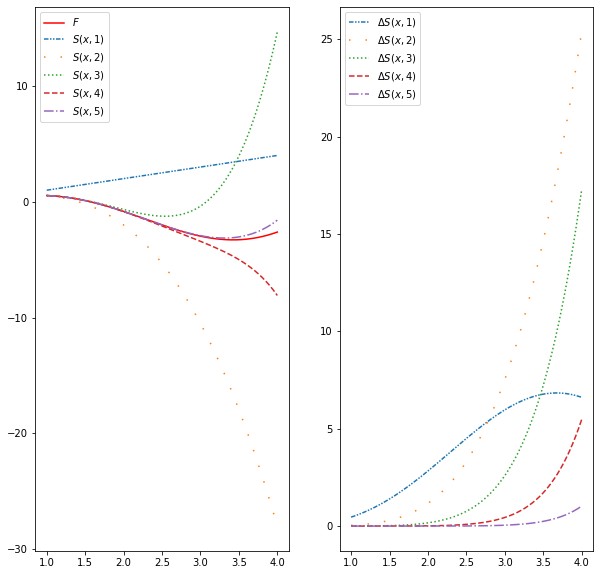

In [17]:
# на первом рисунке - график функции F на отрезке и графики первых 5-ти частичных сумм
# на втором рисунке - графики погрешностей первых 5-ти частичных сумм
fig, axs = plt.subplots(1, 2, figsize = (10, 10))

axs[0].plot(x_data, F(x_data), label = '$F$', color = 'red')

line_styles = ((0, (3, 1, 1, 1, 1, 1)), (0, (1, 10)), 'dotted', 'dashed', 'dashdot')

for i in range(1, 6):
    axs[0].plot(x_data, S(x_data, i), label = f'$S(x, {i})$', ls = line_styles[i-1])
    
for i in range(1, 6):
    axs[1].plot(x_data, abs_fault(x_data, i), label = f'$\Delta S(x, {i})$', ls = line_styles[i-1])
    
axs[0].legend()
axs[1].legend()

In [18]:
eps = 1.0
while 0.5 * eps + 1.0 != 1.0:
    eps /= 2
eps /= 2
print(f'Машинный эпсилон: {eps:.2e}')

Машинный эпсилон: 1.11e-16


In [19]:
c = (a+b)/2 # средняя точка отрезка
p_sum = n_term(c, 1)
N_machine_error = 2
n_t = n_term(c, 2)             # величина относительной погрешности вычислятся как отношение прибавляемого 
while np.abs(n_t/p_sum) > eps: # члена к накопленной частичной сумме 
    p_sum += n_t
    N_machine_error += 1
    n_t = n_term(c, N_machine_error)
print(f'Количество членов ряда, при котором величина относительной погрешности в средней точке отрезка станет меньше машинного эпсилон: {N_machine_error}')

Количество членов ряда, при котором величина относительной погрешности в средней точке отрезка станет меньше машинного эпсилон: 13


[(0.0, 1e-14)]

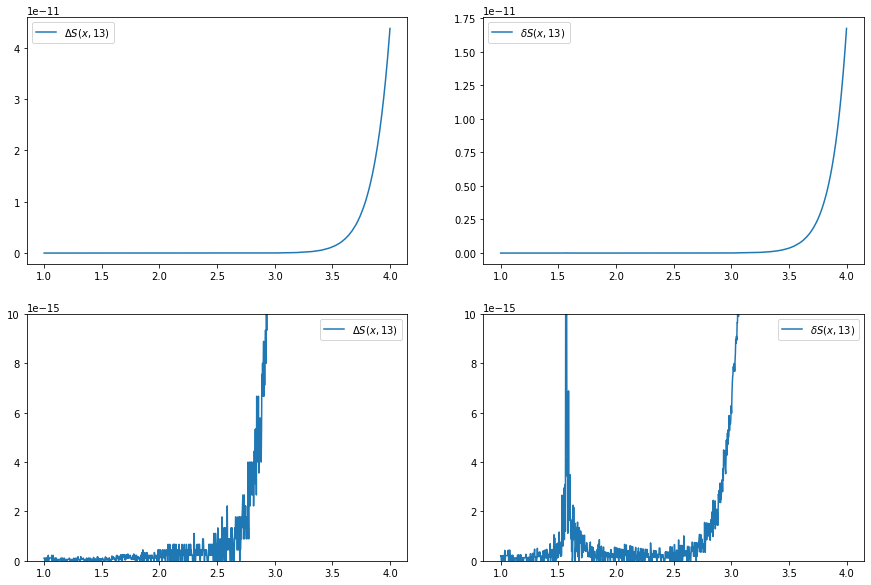

In [24]:
# Графики абсолютной и относительной погрешности частичной суммы из 13 членов ряда
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(x_data, abs_fault(x_data, N_machine_error),
 label=f'$\Delta S(x,{N_machine_error})$')
axs[0][1].plot(x_data, rel_fault(x_data, N_machine_error),
 label=f'$\delta S(x,{N_machine_error})$')
axs[1][0].plot(x_data, abs_fault(x_data, N_machine_error),
 label=f'$\Delta S(x,{N_machine_error})$')
axs[1][1].plot(x_data, rel_fault(x_data, N_machine_error),
 label=f'$\delta S(x,{N_machine_error})$')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
# на нижних двух графиках область значений относительной и абсолютной погрешности расположена 
# на отрезке [0.0, 10E-15] для наглядности
axs[1][0].set(ylim=(0.0, 10E-15))
axs[1][1].set(ylim=(0.0, 10E-15))

In [21]:
# округления вычислений результата до 4 разрядов мантиссы
def ROUND(x):  # вспомогательная функция для округления
     return np.float64(np.format_float_scientific(x, precision = 4))
    
def S_rounded_(x, N): # подсчёт округлённой частичной суммы из N членов ряда в конкретной точке отрезка 
    res = 0
    for i in range(N):
        res += ROUND(n_term(x,i))
        res = ROUND(res)
    return res

def S_rounded(x, N):  # массив округлённых значений
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_rounded_(x[i], N)
    return res

In [22]:
def new_abs_fault(x, n): # абсолютная погрешность с учётом округления
    return np.abs(S_rounded(x, n) - F(x)) 

def new_rel_fault(x, n): # относительная погрешность с учётом округления
    return np.abs(S_rounded(x, n) - F(x)) / np.abs(S_rounded(x, n)) 

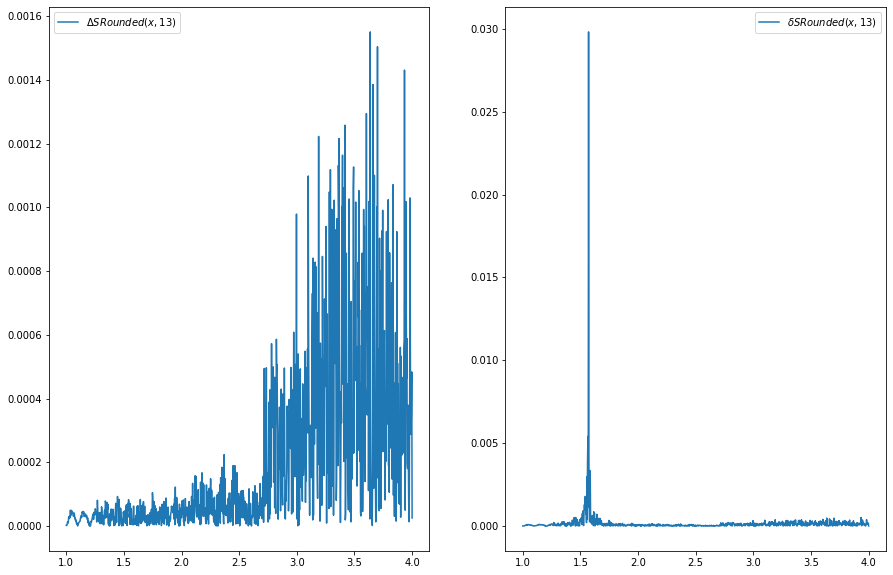

In [25]:
# строим новые графики
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].plot(x_data, new_abs_fault(x_data, N_machine_error),
 label=f'$\Delta SRounded(x,{N_machine_error})$')
axs[1].plot(x_data, new_rel_fault(x_data, N_machine_error),
 label=f'$\delta SRounded(x,{N_machine_error})$')
axs[0].legend()
axs[1].legend()

 $ \textbf{Отчёт по задаче} $: Видно (особенно по графику для абсолютной погрешности), что погрешность при округлении до 4 разрядов мантиссы увеличилась. При округлениии увеличивается абсолютная погрешность $ \rightarrow $ увеличиваются "скачки" на графике, если сравнивать с графиком погрешностей без учёта пользовательского округления. При приближении частичных сумм к исходной функции в окрестности центра разложения погрешность значительно уменьшается, при округлении же частичные суммы в большей степени отдаляются от исходной функции, отсюда возникает большая погрешность. 

## Задача 1.3.

Условие: Дана функция $ f(a, b, c) $ . Значения переменных указаны в варианте со всеми верными цифрами. Оценить погрешность результата двумя способами: а) используя оценки погрешности для арифметических операций, б) используя общую формулу погрешностей. Результат представить в двух формах записи: с явным указанием погрешностей и с учетом количества верных цифр. 

$ f(a, b, c) = \frac{10 a b}{a^2 + c}$

$ a = 12,315 ; b = 0,0352 ; c = 10,82 $

### Первый способ (общая формула погрешностей)

$ \Delta a = 0,0005; \Delta b = 0,00005; \Delta c = 0,005  $

$ \dfrac{\partial f}{\partial a} = \frac{10 b c - 10 a^2 b}{(a^2 + c)^2}$
$ \dfrac{\partial f}{\partial a} = -0,0019 $

$ \dfrac{\partial f}{\partial b} = \frac{10 a}{a^2 + c}$
$ \dfrac{\partial f}{\partial b} = 0,7579 $

$ \dfrac{\partial f}{\partial c} = \frac{- 10 a b}{(a^2 + c)^2}$
$ \dfrac{\partial f}{\partial c} = -0,0002 $

$ \Delta f = |(-0,0019) \cdot 0,0005| + |0,7579 \cdot 0,00005| + |(-0,0002) \cdot 0,005| \approx 0,00004 > 0,0001 $

$ f = 0,0267 \pm 0,0001 $. Три верных цифры 2, 6, 7.

### Второй способ (оценки погрешностей для арифметических операций)

$\delta (a) = \frac{\Delta a}{a} = 0,0000406009 $
$\delta (b) = \frac{\Delta b}{b} = 0,00142046 $
$\delta (c) = \frac{\Delta c}{c} = 0,000462107 $

$ \delta(a*b) \approx  \delta (a) + \delta (b) = 0,001461055 $

$ \Delta(a*b) = \delta(a*b) * a * b = 0,00633350026584 $

$ \Delta(10*a*b) \leq 10 * \Delta(a*b) = 0,0633350026584 $

$ \delta(10*a*b) = 0,014610555 $

$ \delta(a^2) = 0,0000812018 $

$ \Delta (a^2 + c) \leq \Delta (a^2) + \Delta (c)  $

$ \Delta (a^2) = a^2 * \delta(a^2) = 0,012315 $

$ \Delta (a^2 + c) \leq  0,012315 + 0,005 = 0,017315 $

$ \delta(a^2 + c) = 0,000106475 $

$ \delta(f) = \delta(10*a*b) + \delta(a^2 + c) = 0,01471703 $

$ \Delta(f) \approx 0,0004 > 0,0001 $

$ f = 0,0267 \pm 0,0004 $. Две верных цифры 2, 6.

$ \textbf{Отчёт по задаче} $: Выяснил, что погрешность результата, полученная с помощью арифметических операций больше, чем погрешность результата, полученная с помощью общей формулы погрешности. Связано это с тем, что в методе арифметических операций используется больше вычислений $ \rightarrow $ погрешность накапливается в большей степени за счёт погрешности вычислений. В методе общей формулы производится меньшее число вычислений. 